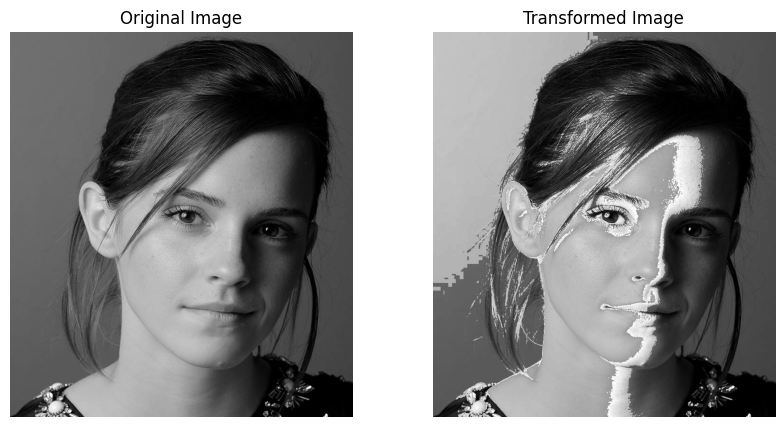

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image (Fig. 1b)
img = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

# Define the intensity transformation function
def intensity_transformation(input_intensity):
    if input_intensity < 100:
        return input_intensity  # Linear with slope 1
    # 2.5 * input_intensity  # Linear with slope 2.5
    elif input_intensity <= 150:
        return input_intensity*1.55 + 22.5
    else:
        return input_intensity  # Linear with slope 1

# Apply the intensity transformation to the image
transformed_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        transformed_img[i, j] = intensity_transformation(img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


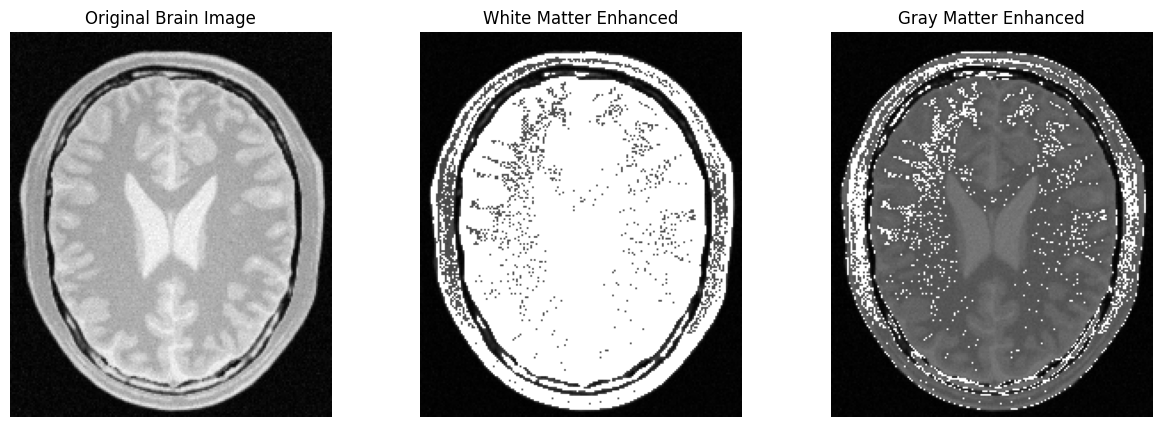

In [26]:
# Load the brain proton density image (Fig. 2)
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

# Define intensity transformation for white and gray matter
# You may need to tune the values for white and gray matter intensity ranges based on the image

def transform_for_white_matter(input_intensity):
    if input_intensity >= 160:  # White matter is typically in higher intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

def transform_for_gray_matter(input_intensity):
    if 100 <= input_intensity < 160:  # Gray matter intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

# Apply transformations for both white and gray matter
white_matter_img = np.zeros_like(brain_img)
gray_matter_img = np.zeros_like(brain_img)

for i in range(brain_img.shape[0]):
    for j in range(brain_img.shape[1]):
        white_matter_img[i, j] = transform_for_white_matter(brain_img[i, j])
        gray_matter_img[i, j] = transform_for_gray_matter(brain_img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(brain_img, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_img, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_img, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.show()


#### 3.1

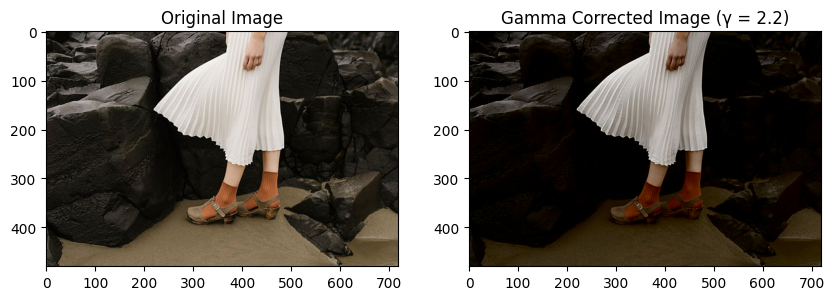

In [27]:
# Load the image for gamma correction (Figure 3)
img = cv2.imread('a1images/highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split L*, a*, and b* channels
L, a, b = cv2.split(lab_img)

# Apply gamma correction to the L channel (assume γ=2.2 for this example)
gamma = 2.2
L_normalized = L / 255.0
L_gamma_corrected = np.power(L_normalized, gamma)
L_gamma_corrected = (L_gamma_corrected * 255).astype(np.uint8)

# Merge back the channels and convert to BGR
lab_img_corrected = cv2.merge([L_gamma_corrected, a, b])
gamma_corrected_img = cv2.cvtColor(lab_img_corrected, cv2.COLOR_LAB2BGR)

# Display original and gamma-corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected_img, cv2.COLOR_BGR2RGB))
plt.title(f'Gamma Corrected Image (γ = {gamma})')

plt.show()


#### 3.2

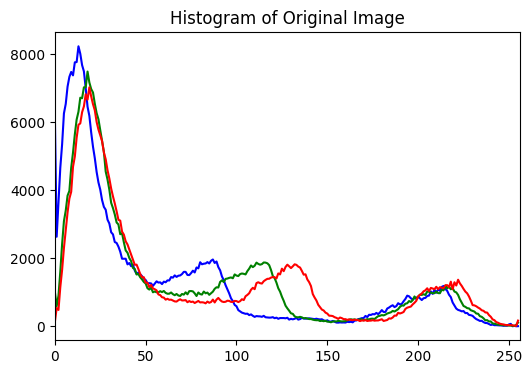

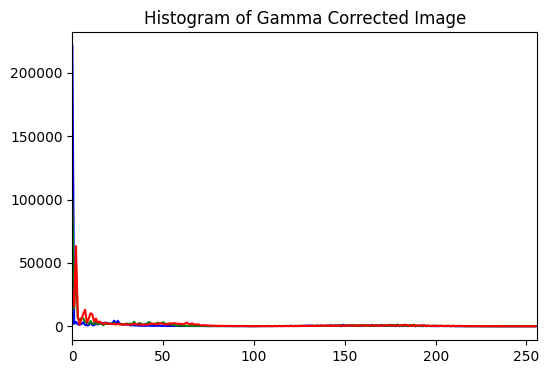

In [28]:
# Function to plot histograms
def plot_histograms(image, title):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(6, 4))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(title)
    plt.xlim([0, 256])

# Plot histograms of the original and gamma corrected images
plot_histograms(img, "Histogram of Original Image")
plot_histograms(gamma_corrected_img, "Histogram of Gamma Corrected Image")
plt.show()


#### 4.1

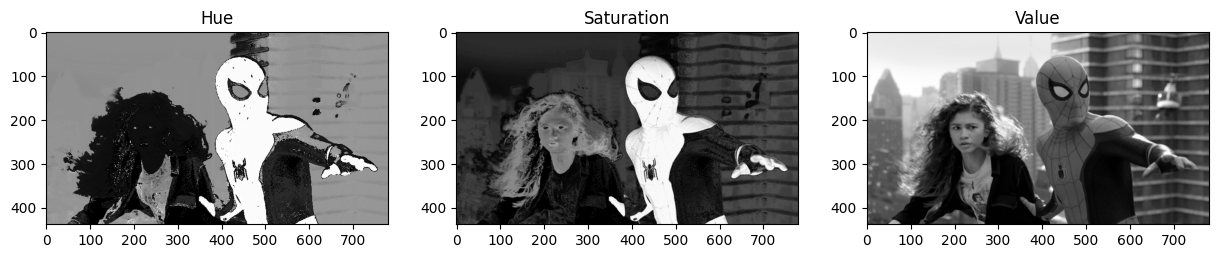

In [29]:
# Load the image (Figure 4)
img_vibrance = cv2.imread('a1images/spider.png')

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(hsv_img)

# Display each channel (Hue, Saturation, Value)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')

plt.show()

In [30]:
def vibrance_intensity_transformation(x, a, sigma=70):
    return np.minimum(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

# Set a value for a
a = 0.5

# Apply the intensity transformation to the saturation channel
s_transformed = vibrance_intensity_transformation(s.astype(np.float64), a)



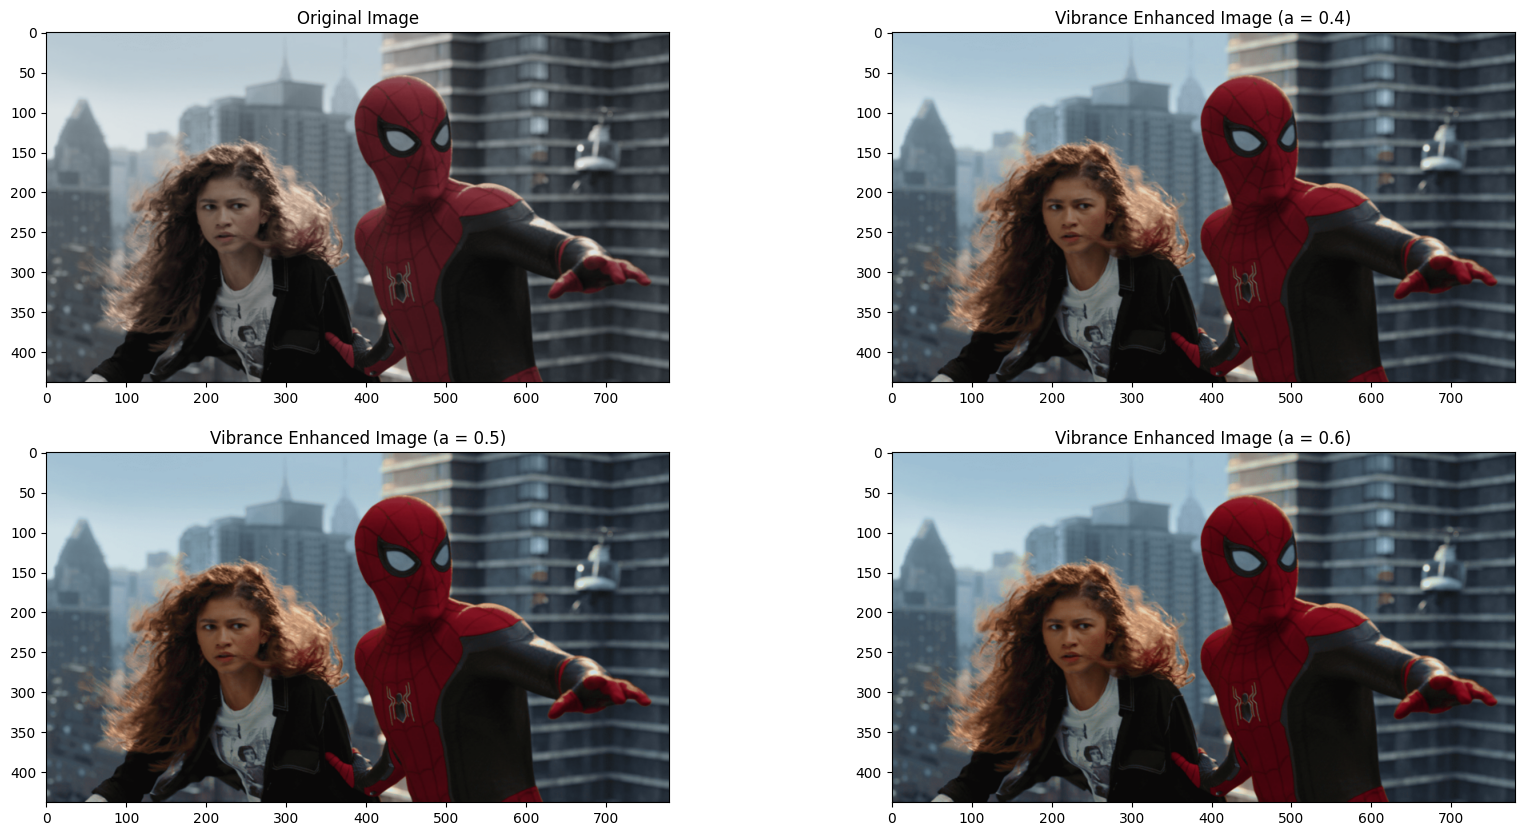

In [31]:
# Set a value for a
a = 0.4

# Apply the intensity transformation to the saturation channel
s_transformed1 = vibrance_intensity_transformation(s.astype(np.float64), a)

# Set a value for a
a = 0.5

# Apply the intensity transformation to the saturation channel
s_transformed2 = vibrance_intensity_transformation(s.astype(np.float64), a)

# Set a value for a
a = 0.6

# Apply the intensity transformation to the saturation channel
s_transformed3 = vibrance_intensity_transformation(s.astype(np.float64), a)

# Convert back to uint8
s_transformed1 = np.clip(s_transformed1, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed1 = cv2.merge([h, s_transformed1, v])
# Convert back to BGR color space
vibrance_enhanced_img1 = cv2.cvtColor(hsv_img_transformed1, cv2.COLOR_HSV2BGR)

# Convert back to uint8
s_transformed2 = np.clip(s_transformed2, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed2 = cv2.merge([h, s_transformed2, v])
# Convert back to BGR color space
vibrance_enhanced_img2 = cv2.cvtColor(hsv_img_transformed2, cv2.COLOR_HSV2BGR)

# Convert back to uint8
s_transformed3 = np.clip(s_transformed3, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed3 = cv2.merge([h, s_transformed3, v])
# Convert back to BGR color space
vibrance_enhanced_img3 = cv2.cvtColor(hsv_img_transformed3, cv2.COLOR_HSV2BGR)

# Display original and vibrance-enhanced images
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img1, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.4)')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img2, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.5)')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img3, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.6)')

plt.show()

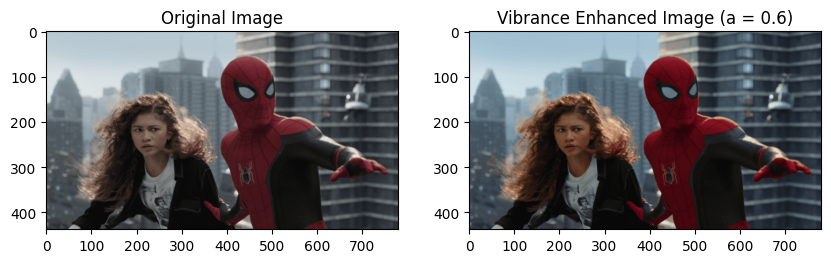

In [32]:

# Convert back to uint8
s_transformed = np.clip(s_transformed, 0, 255).astype(np.uint8)

# Recombine the HSV channels
hsv_img_transformed = cv2.merge([h, s_transformed, v])

# Convert back to BGR color space
vibrance_enhanced_img = cv2.cvtColor(hsv_img_transformed, cv2.COLOR_HSV2BGR)

# Display original and vibrance-enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = {a})')

plt.show()